In [1]:
#MNIST FASHION

In [7]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn

In [3]:
pipeline = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [4]:
dataset = datasets.FashionMNIST('data',download = True,transform = pipeline,train = True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.7MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.47MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [16]:
#Loading the image dataset
img_loader = DataLoader(dataset,batch_size = 64, shuffle = True)

In [32]:
#creating the neural network model
model = torch.nn.Sequential(nn.Linear(784,256),
                            nn.ReLU(),
                            nn.Linear(256,128),
                            nn.ReLU(),
                            nn.Linear(128,64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            nn.LogSoftmax(dim=1))

In [33]:
#creating a Loss function
criteria = nn.NLLLoss()

In [37]:
#creating optimizer
optimizer = optim.Adam(model.parameters(),0.003)

In [45]:
#creating a training loop

epochs = 5

for e in range(epochs):
    running_loss = 0
    for image,label in img_loader:
      #flatten image
      flat_img = image.view(image.shape[0],-1)

      #get logits from network
      logits = model.forward(flat_img)

      #turn the grad to zero
      optimizer.zero_grad()

      #loss
      loss = criteria(logits,label)

      #back propogation
      loss.backward()

      #optimization
      optimizer.step()
      running_loss +=loss.item()
    else:
      print(f"Training Loss is {running_loss/len(img_loader)}")


Training Loss is 0.28541343806903247
Training Loss is 0.2790084244298147
Training Loss is 0.27417213279110536
Training Loss is 0.2687140920681994
Training Loss is 0.26448328389541936


In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels for Fashion-MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def view_classify(img, ps):
    """Visualizes an image and its predicted probabilities."""
    ps = ps.detach().numpy().squeeze()  # Detach from computation graph and convert to NumPy

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)

    # Display the image
    ax1.imshow(img.squeeze(), cmap='gray')
    ax1.axis('off')

    # Display the predicted probabilities as a horizontal bar chart
    ax2.barh(np.arange(len(ps)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(ps)))
    ax2.set_yticklabels(class_labels)  # Use class labels instead of numbers
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)  # Probability values range from 0 to 1

    plt.tight_layout()
    plt.show()


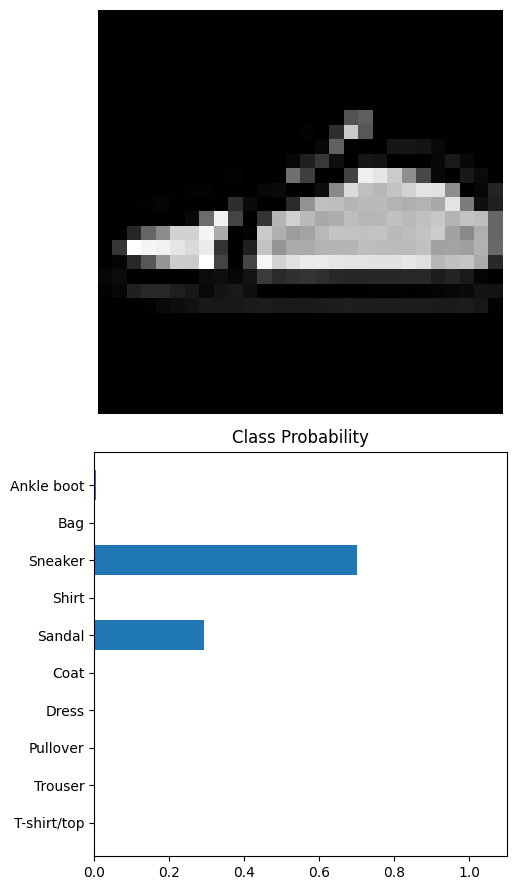

In [62]:
%matplotlib inline
images, labels = next(iter(img_loader))
img = images[0].view(1,784)
with torch.no_grad():
  logps = model(img)
softmax = nn.Softmax(dim=1)
ps = softmax(logps)

view_classify(img.view(1,28,28),ps)